In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [2]:
# use self defined stdev function because the numpy one calculates population std
def stdev(array):
    if len(array) <= 1:
        return None
    mean = np.average(array)
    sum_array = (array - mean)**2
    return math.sqrt(sum(sum_array)/(len(array)-1))

In [3]:
ratio = 1.902

# Exercise 2a, calculate average wavelength
wavelengths_5 = np.loadtxt('freq_wavelength_5hz.txt', skiprows=1) / 100
wavelengths_8 = np.loadtxt('freq_wavelength_8hz.txt', skiprows=1) / 100
wavelengths_10 = np.loadtxt('freq_wavelength_10hz.txt', skiprows=1) / 100
wavelengths_13 = np.loadtxt('freq_wavelength_13hz.txt', skiprows=1) / 100
wavelengths_16 = np.loadtxt('freq_wavelength_16hz.txt', skiprows=1) / 100
wavelengths_18_5 = np.loadtxt('freq_wavelength_18_5hz.txt', skiprows=1) / 100

# get average
ave_5 = np.mean(wavelengths_5) * 1.902
ave_8 = np.mean(wavelengths_8) * 1.902
ave_10 = np.mean(wavelengths_10) * 1.902
ave_13 = np.mean(wavelengths_13) * 1.902
ave_16 = np.mean(wavelengths_16) * 1.902
ave_18_5 = np.mean(wavelengths_18_5) * 1.902

u_5 = stdev(wavelengths_5)
u_8 = stdev(wavelengths_8)
u_10 = stdev(wavelengths_10)
u_13 = stdev(wavelengths_13)
u_16 = stdev(wavelengths_16)
u_18_5 = stdev(wavelengths_18_5)

print('At 5 Hz, the wavelength is', ave_5, '±', u_5, 'm')
print('At 8 Hz, the wavelength is', ave_8, '±', u_8, 'm')
print('At 10 Hz, the wavelength is', ave_10, '±', u_10, 'm')
print('At 13 Hz, the wavelength is', ave_13, '±', u_13, 'm')
print('At 16 Hz, the wavelength is', ave_16, '±', u_16, 'm')
print('At 18.5 Hz, the wavelength is', ave_18_5, '±', u_18_5, 'm')

At 5 Hz, the wavelength is 0.08125344 ± 0.0016208022704821221 m
At 8 Hz, the wavelength is 0.050479079999999996 ± 0.0005727128425310552 m
At 10 Hz, the wavelength is 0.03998004 ± 0.0006418722614352475 m
At 13 Hz, the wavelength is 0.02917668 ± 0.0004774934554525337 m
At 16 Hz, the wavelength is 0.024954239999999996 ± 0.00010954451150103256 m
At 18.5 Hz, the wavelength is 0.02107416 ± 0.0004604345773288534 m


In [4]:
def linear_model(x, a, b):
    return a * x + b

# this is defined to compensate the large error source in exercise 2b
def linear_model_nob(x, a):
    return a * x

The velocity is given by the slope of the linear fit, which is 0.40524804120374264 ± 0.006671222292797765 m/s
The wavelength at 20 Hz is 0.019798412582032104 m ± 0.006686556750825085 m


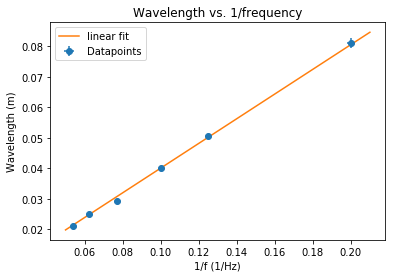

In [5]:
# graphing lambda vs. 1 / f
lambda_arr = np.array([ave_5, ave_8, ave_10, ave_13, ave_16, ave_18_5])
freq_arr = np.array([5, 8, 10, 13, 16, 18.5])
sigma_arr = np.array([u_5, u_8, u_10, u_13, u_16, u_18_5])

lambda_freq_popt, lambda_freq_pcov = curve_fit(linear_model, 1 / freq_arr, lambda_arr, 
                                                 sigma=sigma_arr, absolute_sigma=True)
lambda_freq_a = lambda_freq_popt[0]
lambda_freq_b = lambda_freq_popt[1]
lambda_freq_pvar = np.diag(lambda_freq_pcov)
lambda_freq_stdev = np.sqrt(lambda_freq_pvar)

print('The velocity is given by the slope of the linear fit, which is', lambda_freq_a, '±', lambda_freq_stdev[0], 'm/s')

lambda_freq_x = np.linspace(0.05, 0.21, 10)
lambda_freq_y = linear_model(lambda_freq_x, lambda_freq_a, lambda_freq_b)

# This is for later use in exercise 5
freq_20 = linear_model(1/20, lambda_freq_a, lambda_freq_b)
u_freq_20 = np.sqrt((lambda_freq_stdev[0])**2 + (lambda_freq_stdev[1])**2)
print('The wavelength at 20 Hz is', freq_20, 'm ±', u_freq_20, 'm')

plt.errorbar(1 / freq_arr, lambda_arr, xerr=np.array(freq_arr**(-2) * 0.05), yerr=sigma_arr, 
             marker='o',fmt='.', label='Datapoints')
plt.plot(lambda_freq_x, lambda_freq_y, label='linear fit')
plt.title('Wavelength vs. 1/frequency')
plt.xlabel('1/f (1/Hz)')
plt.ylabel('Wavelength (m)')
plt.legend()

At depth 0.003 m, the wavelength is 0.019679999999999996 ± 0.000601664358259653 m
At depth 0.005 m, the wavelength is 0.020539999999999996 ± 0.0006542170893518439 m
At depth 0.006 m, the wavelength is 0.02146 ± 0.0006228964600958974 m
At depth 0.0085 m, the wavelength is 0.022699999999999998 ± 0.000696419413859205 m
At depth 0.01 m, the wavelength is 0.02278 ± 0.0006648308055437858 m
The slope suggests a g value of 7.09062075351073 ± 0.19638245566746268 m/s^2


Text(0,0.5,'wave speed (m/s)')

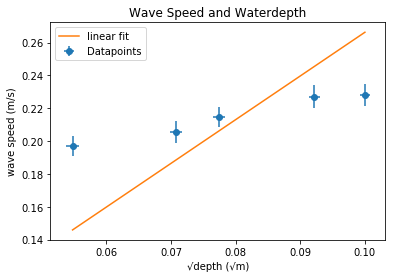

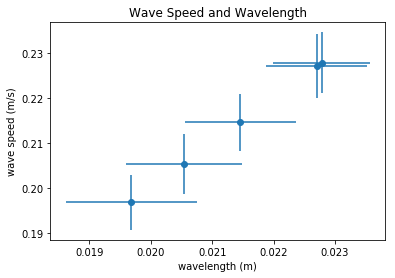

In [6]:
# Exercise 2b, relationship between wave speed and water depth, the original measurements were in cm
w_03 = np.loadtxt('depth_0_3.txt', skiprows=1) / 100
w_05 = np.loadtxt('depth_0_5.txt', skiprows=1) / 100
w_06 = np.loadtxt('depth_0_6.txt', skiprows=1) / 100
w_085 = np.loadtxt('depth_0_85.txt', skiprows=1) / 100
w_1 = np.loadtxt('depth_1.txt', skiprows=1) / 100

# get average
ave_03 = np.mean(w_03)
ave_05 = np.mean(w_05)
ave_06 = np.mean(w_06)
ave_085 = np.mean(w_085)
ave_1 = np.mean(w_1)

u_03 = stdev(w_03)
u_05 = stdev(w_05)
u_06 = stdev(w_06)
u_085 = stdev(w_085)
u_1 = stdev(w_1)

print('At depth 0.003 m, the wavelength is', ave_03, '±', u_03, 'm')
print('At depth 0.005 m, the wavelength is', ave_05, '±', u_05, 'm')
print('At depth 0.006 m, the wavelength is', ave_06, '±', u_06, 'm')
print('At depth 0.0085 m, the wavelength is', ave_085, '±', u_085, 'm')
print('At depth 0.01 m, the wavelength is', ave_1, '±', u_1, 'm')

# get speed, at 10 Hz
v_03 = ave_03 * 10
v_05 = ave_05 * 10
v_06 = ave_06 * 10
v_085 = ave_085 * 10
v_1 = ave_1 * 10

# uncertainty of frequency is 0.05 Hz because of the analog reading
u_v_03 = v_03 * np.sqrt((0.05/10)**2 + (u_03/ave_03)**2)
u_v_05 = v_05 * np.sqrt((0.05/10)**2 + (u_05/ave_05)**2)
u_v_06 = v_06 * np.sqrt((0.05/10)**2 + (u_06/ave_06)**2)
u_v_085 = v_085 * np.sqrt((0.05/10)**2 + (u_085/ave_085)**2)
u_v_1 = v_1 * np.sqrt((0.05/10)**2 + (u_1/ave_1)**2)

lambda_d_arr = np.array([ave_03, ave_05, ave_06, ave_085, ave_1])
v_d_arr = np.array([v_03, v_05, v_06, v_085, v_1])
uv_d_arr = np.array([u_v_03, u_v_05, u_v_06, u_v_085, u_v_1])
ulambda_d_arr = np.array([u_03, u_05, u_06, u_085, u_1])
d_arr = np.array([0.003, 0.005, 0.006, 0.0085, 0.01]) ** 0.5
u_d_arr = 0.5 * d_arr ** (-0.5) * np.array([0.0005] * len(d_arr))

vd_popt, vd_pcov = curve_fit(linear_model_nob, d_arr, v_d_arr,
                             sigma=uv_d_arr, absolute_sigma=True)
vd_a = vd_popt[0]
vd_pvar = np.diag(vd_pcov)
vd_stdev = np.sqrt(vd_pvar)
vd_asquared = 2 * vd_a * vd_stdev[0]

vd_y = linear_model_nob(d_arr, vd_a)

print('The slope suggests a g value of', vd_a ** 2, '±', vd_asquared, 'm/s^2')

plt.figure(1)
plt.errorbar(d_arr, v_d_arr, xerr=u_d_arr, yerr=uv_d_arr, 
             marker='o',fmt='.', label='Datapoints')
plt.plot(d_arr, vd_y, label='linear fit')
plt.title('Wave Speed and Waterdepth')
plt.xlabel('√depth (√m)')
plt.ylabel('wave speed (m/s)')
plt.legend()

# plotting v and lambda
plt.figure(2)
plt.errorbar(lambda_d_arr, v_d_arr, xerr=u_d_arr, yerr=uv_d_arr, 
             marker='o',fmt='.')
plt.title('Wave Speed and Wavelength')
plt.xlabel('wavelength (m)')
plt.ylabel('wave speed (m/s)')

The wavelength is given by the slope of the linear fit, which is 0.00850412712668789 ± 0.0008525603327166797 m


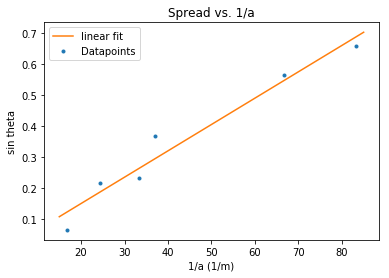

In [7]:
# Exercise 4
a, angle = np.loadtxt('slit_width_and_angle.txt', skiprows=1, unpack=True)
angle = np.deg2rad(angle)
angle_err = np.array([np.sin(np.deg2rad(2.83))] * len(angle))

one_over_a = 1 / (a/100) # convert to m
sin_angle = np.sin(angle/2)

sv1a_popt, sv1a_pcov = curve_fit(linear_model, one_over_a, sin_angle, 
                                 sigma=angle_err, absolute_sigma=True)
sv1a_a = sv1a_popt[0]
sv1a_b = sv1a_popt[1]
sv1a_pvar = np.diag(sv1a_pcov)
sv1a_stdev = np.sqrt(sv1a_pvar)

print('The wavelength is given by the slope of the linear fit, which is', sv1a_a, '±', sv1a_stdev[0], 'm')

sv1a_x = np.linspace(15, 85, 10)
sv1a_y = linear_model(sv1a_x, sv1a_a, sv1a_b)

plt.errorbar(one_over_a, sin_angle, fmt='.', label='Datapoints')
plt.plot(sv1a_x, sv1a_y, label='linear fit')
plt.title('Spread vs. 1/a')
plt.xlabel('1/a (1/m)')
plt.ylabel('sin theta')
plt.legend()

In [9]:
upper_n = 6
lower_n = 2
degrees_of_freedom = upper_n - lower_n

chi_squared_sv1a = (1 / degrees_of_freedom) * sum(((sin_angle[: degrees_of_freedom] - sv1a_y[: degrees_of_freedom])\
                                            / angle_err[: degrees_of_freedom])**2)

chi_squared_sv1a2 = (1 / degrees_of_freedom) * sum(((sin_angle[: degrees_of_freedom] - sv1a_y[: degrees_of_freedom])\
                                            / (angle_err[: degrees_of_freedom]*2))**2)

print("The chi squared value we got for the fit is,", str(chi_squared_sv1a),\
      ". Which we think is fairly big.")

print("The chi squared value we got for the fit if the error in angle is doubled equals,", str(chi_squared_sv1a2),\
      ". Which is a rapid drop from", chi_squared_sv1a)

The chi squared value we got for the fit is, 19.77459989417194 . Which we think is fairly big.
The chi squared value we got for the fit if the error in angle is doubled equals, 4.943649973542985 . Which is a rapid drop from 19.77459989417194
